# Model Building

Wir haben unsere Daten auf den 20 realen Spalten trainiert. Danach führen wir den Code von oben erneut aus und lassen den trainingsprozess aus, um random testdaten zu erzielen. Diese random testdaten (19 Spalten random - nur Pow_600 original) übergeben wir dem Model. Dieses predicted Pow_600 ebenfalls gut. Möglciherweise muss das Model aber wissen an welchen Stelle die Pow_x ist.

## Imports

In [1]:
# Imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import MeanSquaredError
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import tensorflow.keras as K

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

Set Graphic Resulution

In [2]:
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300

Read In the different Datasets

In [17]:
df = pd.read_excel('DiscreteMotion_Data_Horizontalsetup.xlsx')

In [18]:
df.Pow_100 = np.random.randint(1, 31, df.shape[0])
df.Pow_200 = np.random.randint(1, 31, df.shape[0])
df.Pow_300= np.random.randint(1, 31, df.shape[0])
df.Pow_400= np.random.randint(1, 31, df.shape[0])
df.Pow_500= np.random.randint(1, 31, df.shape[0])
#
df.Pow_700= np.random.randint(1, 31, df.shape[0])
df.Pow_800= np.random.randint(1, 31, df.shape[0])
df.Pow_900= np.random.randint(1, 31, df.shape[0])
df.Pow_1000= np.random.randint(1, 31, df.shape[0])
df.Pow_1100= np.random.randint(1, 31, df.shape[0])
df.Pow_1200= np.random.randint(1, 31, df.shape[0])
df.Pow_1300= np.random.randint(1, 31, df.shape[0])
df.Pow_1400= np.random.randint(1, 31, df.shape[0])
df.Pow_1500= np.random.randint(1, 31, df.shape[0])
df.Pow_1600= np.random.randint(1, 31, df.shape[0])
df.Pow_1700= np.random.randint(1, 31, df.shape[0])
df.Pow_1800= np.random.randint(1, 31, df.shape[0])
df.Pow_1900= np.random.randint(1, 31, df.shape[0])
df.Pow_2000= np.random.randint(1, 31, df.shape[0])



In [19]:
df

Pow_100  Pow_200  Pow_300  Pow_400  Pow_500  Pow_600  Pow_700  Pow_800  \
0           10        2        6        6       26    0.516       19       14   
1           15       16       12       26        1    0.516        3        3   
2           11       11        9       15        7    5.676       10        4   
3           28       11        8       27       18    5.676       19        1   
4            9        4       15       22        2    5.676        8        9   
...        ...      ...      ...      ...      ...      ...      ...      ...   
44995       20       20       25       25        3    5.566       15       11   
44996       11       18       16       11       25    5.566        3        6   
44997       20        2       16       26       13    5.566        6        8   
44998        3        8       24        7        1    5.566        3        1   
44999        7       14       16       10       13    5.566       24       21   

       Pow_900  Pow_1000  Pow_1100  Pow_1200  Pow_1300  Pow_1400  Pow_1500  \
0            9         6         8        25        10        30        16   
1            2         5         8        15        28        23         3   
2           27         3        29         8        18        15         1   
3           10        18         3        12        13        13         1   
4           10        20        25        14        30        24         1   
...        ...       ...       ...       ...       ...       ...       ...   
44995       30         1        14        22         9        14         3   
44996        6         7        19        17        22        21         1   
44997        2        28        15        27        27        27        15   
44998        8        30        30        28        28        10         4   
44999        1        18         4        19        28         3        17   

       Pow_1600  Pow_1700  Pow_1800  Pow_1900  Pow_2000  
0            28        24        28         4         2  
1            28         6         2        27         9  
2            15        17        22        23        20  
3             7        24        24         5        25  
4            19        13         8        21         1  
...         ...       ...       ...       ...       ...  
44995        30        19         9        10         8  
44996        13        20         2        28        29  
44997        10        22         2         4        28  
44998        18        27         7        15         5  
44999        22        17         4        13        26  

[45000 rows x 20 columns]

Set the dataframes' time index to a 45000 entity long datetime64 range separated by 10 ms

In [20]:
time_index = np.arange('1970-01-01T00:00:00.000', '1970-01-01T00:07:30.000',dtype='datetime64[10ms]')
df['time_index'] = time_index
df.set_index('time_index', inplace=True)

In [21]:
df.describe()

Pow_100       Pow_200       Pow_300       Pow_400       Pow_500  \
count  45000.000000  45000.000000  45000.000000  45000.000000  45000.000000   
mean      15.469556     15.503311     15.540333     15.495489     15.462956   
std        8.643041      8.636275      8.668195      8.647700      8.655291   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        8.000000      8.000000      8.000000      8.000000      8.000000   
50%       15.000000     15.000000     16.000000     15.000000     15.000000   
75%       23.000000     23.000000     23.000000     23.000000     23.000000   
max       30.000000     30.000000     30.000000     30.000000     30.000000   

            Pow_600       Pow_700       Pow_800       Pow_900      Pow_1000  \
count  45000.000000  45000.000000  45000.000000  45000.000000  45000.000000   
mean       2.493221     15.509956     15.428911     15.538378     15.520200   
std        2.058099      8.641505      8.671465      8.673427      8.666003   
min        0.000000      1.000000      1.000000      1.000000      1.000000   
25%        0.265500      8.000000      8.000000      8.000000      8.000000   
50%        3.738000     15.000000     15.000000     16.000000     15.000000   
75%        4.242000     23.000000     23.000000     23.000000     23.000000   
max        7.608000     30.000000     30.000000     30.000000     30.000000   

           Pow_1100      Pow_1200      Pow_1300    Pow_1400      Pow_1500  \
count  45000.000000  45000.000000  45000.000000  45000.0000  45000.000000   
mean      15.445467     15.485733     15.485111     15.5040     15.526889   
std        8.655525      8.675831      8.647593      8.6297      8.680019   
min        1.000000      1.000000      1.000000      1.0000      1.000000   
25%        8.000000      8.000000      8.000000      8.0000      8.000000   
50%       15.000000     15.000000     15.000000     16.0000     16.000000   
75%       23.000000     23.000000     23.000000     23.0000     23.000000   
max       30.000000     30.000000     30.000000     30.0000     30.000000   

           Pow_1600      Pow_1700      Pow_1800      Pow_1900      Pow_2000  
count  45000.000000  45000.000000  45000.000000  45000.000000  45000.000000  
mean      15.542578     15.433067     15.494356     15.529667     15.473711  
std        8.659519      8.655836      8.648871      8.629048      8.669876  
min        1.000000      1.000000      1.000000      1.000000      1.000000  
25%        8.000000      8.000000      8.000000      8.000000      8.000000  
50%       16.000000     15.000000     15.000000     15.000000     15.000000  
75%       23.000000     23.000000     23.000000     23.000000     23.000000  
max       30.000000     30.000000     30.000000     30.000000     30.000000

## Defining Functions

Split the data accoring into Train Data (80%) , Validation Data (10%) and Test Data (10%) 

In [22]:
def split_data(df):
    train = df[:36000]
    val = df[36000:40500]
    test = df[40500:]
    return train, val, test

Normalize the Data in a range between 0 and 1

In [23]:
def scale_data(train, val, test):
    scaler = MinMaxScaler(feature_range=(0,1))
    train_scaled = scaler.fit_transform(train)
    val_scaled = scaler.transform(val)
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, val_scaled, test_scaled

function to create 3D arrays with certain window sizes for X_input and Y_output **(Window-Size Approach)**




In [24]:
def to_supervised(sequence, window_size, forecast_horizon):
    X, y = [], []
    for i in range(len(sequence) - window_size - forecast_horizon + 1):
        X.append(sequence[i:i+window_size])
        y.append(sequence[i+window_size:i+window_size+forecast_horizon])
    return np.array(X), np.array(y)

## Data Preparation

Split the dataframe into Train-, Val- and Test Data

In [25]:
train, val, test = split_data(df)

Scale the Data betweet 0 and 1 using the MinMaxScaler

In [26]:
scaler, train, val, test = scale_data(train, val, test)

Prepare the input for supervised learning (using a **window-size of 40** and a **forecast-horizon of 20**)

In [27]:
X_train, y_train = to_supervised(train, window_size=40, forecast_horizon=20)
X_val, y_val = to_supervised(val, window_size=40, forecast_horizon=20)
X_test, y_test = to_supervised(test, window_size=40, forecast_horizon=20)

Check the shape of the Training Data

In [28]:
X_train.shape

(35941, 40, 20)

## Build LSTM Model

### Model Summary

In [14]:
model = Sequential()
model.add(LSTM(128, input_shape=(40, 20), activation='relu'))
model.add(RepeatVector(20))
model.add(LSTM(64, return_sequences=True))
model.add(TimeDistributed(Dense(32)))
model.add(Dense(20))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               76288     
                                                                 
 repeat_vector (RepeatVector  (None, 20, 128)          0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 20, 64)            49408     
                                                                 
 time_distributed (TimeDistr  (None, 20, 32)           2080      
 ibuted)                                                         
                                                                 
 dense_1 (Dense)             (None, 20, 20)            660       
                                                                 
Total params: 128,436
Trainable params: 128,436
Non-trai

### Compile the LSTM Model

In [15]:
model.compile(loss='mae', optimizer=Adam(learning_rate=0.001), metrics=['mse'])

Create Callback and Fit the Training Dataset

In [16]:
stop_early_lstm = K.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val), callbacks=[stop_early_lstm])

Epoch 1/5
1124/1124 [==============================] - 86s 74ms/step - loss: 0.1715 - mse: 0.0635 - val_loss: 0.1435 - val_mse: 0.0437
Epoch 2/5
1124/1124 [==============================] - 76s 68ms/step - loss: 0.1264 - mse: 0.0364 - val_loss: 0.1196 - val_mse: 0.0324
Epoch 3/5
1124/1124 [==============================] - 77s 68ms/step - loss: 0.1122 - mse: 0.0304 - val_loss: 0.1090 - val_mse: 0.0283
Epoch 4/5
1124/1124 [==============================] - 77s 69ms/step - loss: 0.1049 - mse: 0.0283 - val_loss: 0.1033 - val_mse: 0.0269
Epoch 5/5
1124/1124 [==============================] - 76s 68ms/step - loss: 0.0999 - mse: 0.0269 - val_loss: 0.1011 - val_mse: 0.0265


### Model History

Summarize and plot the history of the loss and val_loss

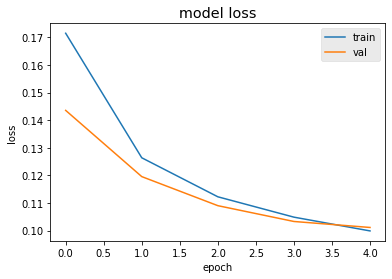

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.style.use("ggplot")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

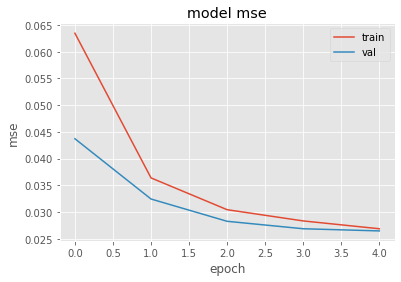

In [30]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.style.use("ggplot")
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

Evaluate Model // Show the MAE and MSE metrics

In [31]:
model.evaluate(X_test, y_test)

139/139 [==============================] - 3s 23ms/step - loss: 0.3889 - mse: 0.2297


[0.3889458477497101, 0.2297116070985794]

### Predicting LSTM

Predict LSTM Model

In [32]:
yhat = model.predict(X_test)

139/139 [==============================] - 4s 23ms/step


In [33]:
test_shape = y_test.shape

Saving the shape of y_test

In [34]:
yhat

array([[[ 6.37935936e-01,  8.80270362e-01,  5.77024817e-01, ...,
          2.44684994e-01,  1.68914109e-01,  2.49056265e-01],
        [ 6.12189054e-01,  8.10996532e-01,  5.62955141e-01, ...,
          2.17553109e-01,  7.91552961e-02,  2.44966030e-01],
        [ 5.99570036e-01,  8.03935945e-01,  5.64767838e-01, ...,
          1.92765892e-01,  3.58077586e-02,  2.11051494e-01],
        ...,
        [ 6.54075563e-01,  7.04326034e-01,  5.99024057e-01, ...,
          2.65497565e-02,  2.57788450e-02, -5.67609295e-02],
        [ 6.53605640e-01,  7.04032004e-01,  5.99541426e-01, ...,
          2.66988985e-02,  2.60926038e-02, -5.73621169e-02],
        [ 6.53143525e-01,  7.03782558e-01,  5.99879622e-01, ...,
          2.68588774e-02,  2.63208747e-02, -5.77480197e-02]],

       [[ 3.09616536e-01,  7.79809058e-01,  7.88656950e-01, ...,
          1.36634856e-01,  2.60833591e-01,  3.29528958e-01],
        [ 2.24946529e-01,  7.25445449e-01,  7.67692685e-01, ...,
          1.10003643e-01,  1.41646072e

Backing up the data

In [35]:
yhat2 = yhat
y_test2 = y_test

New Unseen Predictions

Function for rescaling the Data fo fit into the DL-Models

In [36]:
def inverse_scale_data(yhat, y_test):
    yhat_reshaped = yhat.reshape(-1,yhat.shape[-1])
    y_test_reshaped = y_test.reshape(-1,y_test.shape[-1])

    yhat_inverse = scaler.inverse_transform(yhat_reshaped)
    y_test_inverse = scaler.inverse_transform(y_test_reshaped)
    return yhat_inverse, y_test_inverse

Rescale

In [37]:
def inverse_scale_data_alt(yhat, y_test):
    yhat_reshaped = yhat.reshape(-1,yhat.shape[-1])
    y_test_reshaped = y_test.reshape(-1,y_test.shape[-1])
    
    yhat_inverse = scaler.inverse_transform(yhat_reshaped)
    y_test_inverse = scaler.inverse_transform(y_test_reshaped)

    return yhat_inverse, y_test_inverse

In [38]:
re_yhat, re_y_test = inverse_scale_data_alt(yhat2, y_test2)

### Calculating the additional Predictions of 600ms (AddOn – Recursive Method)

In [39]:
y_test_3 = y_test
y_test_4 = y_test
y_test_5 = y_test

In [40]:
# reshape from 2D back to 3D (2D was necessary for the inverse scaling)
re_yhat2 = re_yhat.reshape(test_shape)
re_y_test2 = re_y_test.reshape(test_shape)

# Model Evaluation

## Defining Functions

In [41]:
from math import sqrt
# evaluate forecasts against expected values
def evaluate_forecasts(actual, predicted):
    scores_pow = results = np.zeros((20, 20))
    scores = []
 # calculate an RMSE score for each prediction period
    for i in range(actual.shape[1]):
      for t in range(actual.shape[2]):
       # calculate mse
       scores_pow[i, t] = sqrt(mean_squared_error(actual[:, t, i], predicted[:, t, i]))
 # calculate overall RMSE
    s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col, 1] - predicted[row, col, 1])**2
            score = sqrt(s / (actual.shape[0] * actual.shape[1]))
    return np.array(score), np.array(scores_pow)

In [42]:
def summarize_scores(name, score, scores):
    s_scores = ', '.join(['%.3f'% s for s in scores])
    print('%s: [%.3f] %s' % (name, score, s_scores))

## Evaluate Model

In [43]:
overall_RMSE, all_RMSEs = evaluate_forecasts(re_y_test2, re_yhat2)

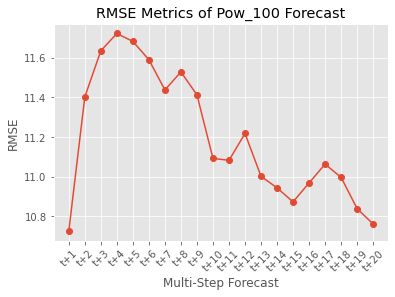

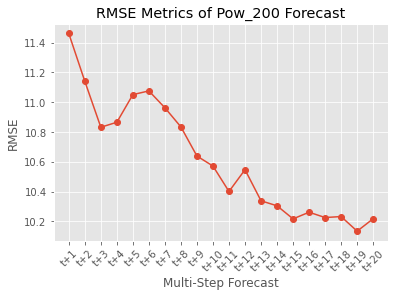

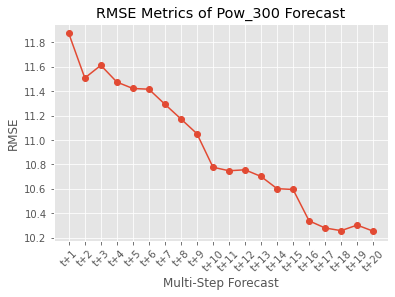

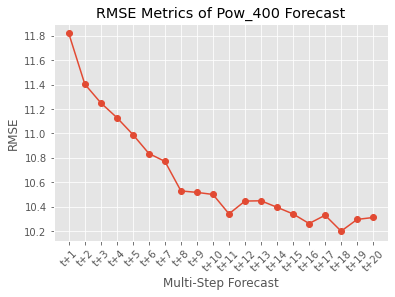

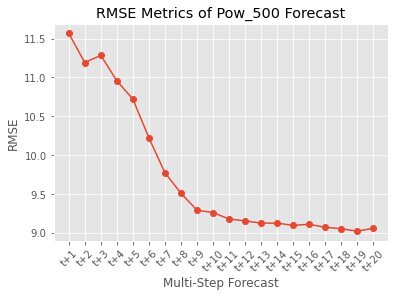

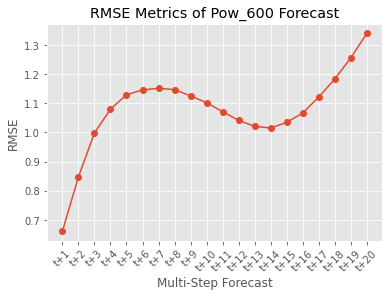

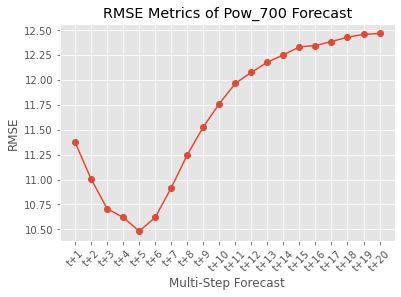

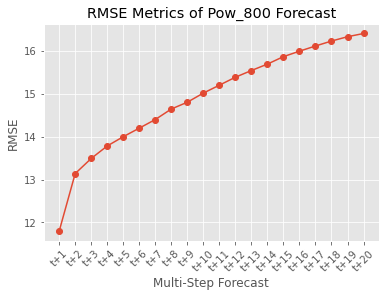

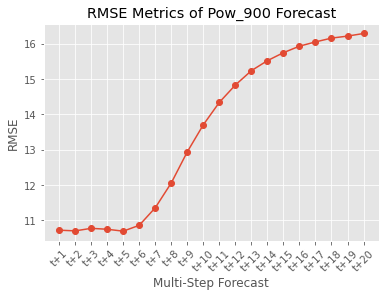

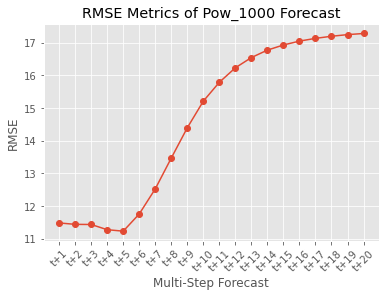

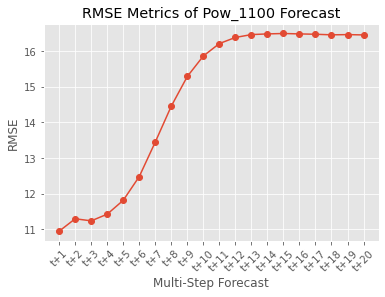

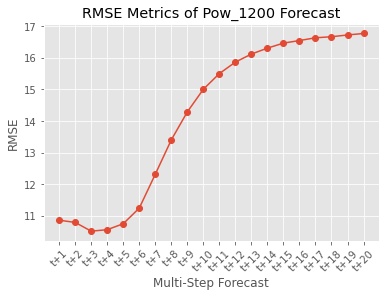

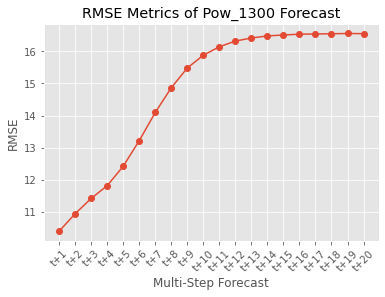

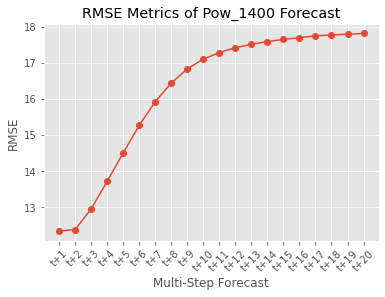

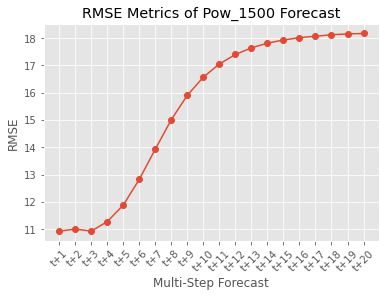

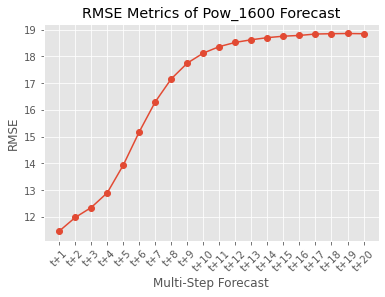

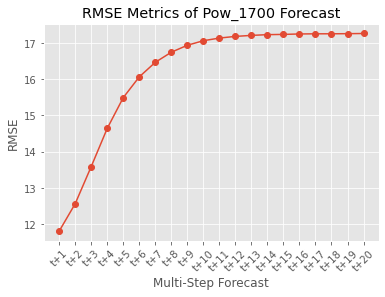

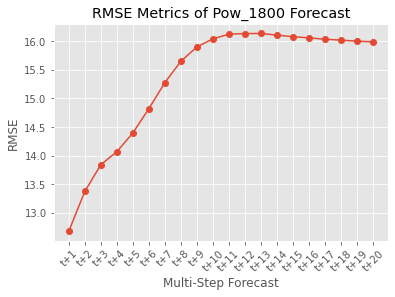

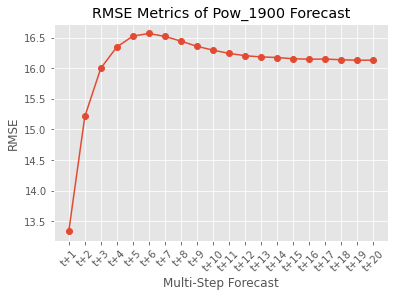

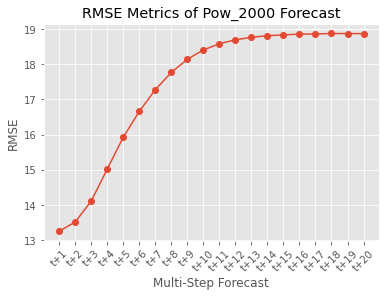

In [44]:
forecast = []
for i in range(1,21):
    title = f't+{i}'
    forecast.append(title)
for i in range(20):
  plt.style.use("ggplot")
  plt.plot(forecast, all_RMSEs[i], marker='o', label='lstm')
  plt.xticks(rotation=45)
  plt.title('RMSE Metrics of Pow_' +str(100*(i+1))+ ' Forecast')
  plt.xlabel('Multi-Step Forecast')
  plt.ylabel('RMSE')
  plt.show()

Build the dataframe for the additional 600ms predictions (Recursive Method)

**Function for printing out the 20 RMP`s Predictions vs. its Acutals**

In [45]:
from sklearn.metrics import r2_score
def print_act_and_pred_tables(yhat,ytest,forecast_horizon, start_graph,end_graph):
  pow_preds = []
  pow_actuals = []
  for i in range(20):
    pow_preds.append(yhat[:, forecast_horizon-1, i]) # 1 refers to the forecast horizon --> t+1; shape of yhat: [(length), (n_outputs), (n_features)]
    pow_actuals.append(ytest[:, 0, i])

  data = {}
  for i in range(20):
    pow_pred_label = f"Pow{100*(i+1)} Predictions"
    pow_act_label = f"Pow{100*(i+1)} Actuals"
    data[pow_pred_label] = pow_preds[i]
    data[pow_act_label] = pow_actuals[i]
  df_new = pd.DataFrame(data=data)
  #Plot
  for i in range(20):
    fig = plt.figure(figsize=(15, 7))
    plt.style.use("ggplot")
    # Select the actuals and predictions columns
    actuals = df_new[f"Pow{100*(i+1)} Actuals"][start_graph:end_graph]
    predictions = df_new[f"Pow{100*(i+1)} Predictions"][start_graph:end_graph]
    # shift the t+20 prediction 20 (relating to the wished forecast horizon) to the right
    p_temp = predictions.to_frame()
    p_temp['time_index_shift'] = predictions.index+forecast_horizon-1
    p_temp.set_index('time_index_shift', inplace=True)
    # Plot the data
    plt.plot(p_temp, alpha=0.6)
    plt.plot(actuals, alpha=0.7)
    # Set the plot title and axis labels
    plt.title(f'Pow{100*(i+1)} Predictions and Actuals (Discrete Motion)')
    plt.xlabel('Time in ms')
    plt.ylabel('Power Consumption in Watts')
    # Draw horizontal Lines for better comparison
    plt.axvline(x=4439, linestyle=":", color="grey")
    plt.axvline(x=4477, linestyle="-", linewidth = 75, color="red", alpha=0.05)
    # Set the legend
    plt.legend(['Predictions', 'Actuals'])
    # Show the plot
    plt.show()

## Print Actuals and Predictions

### **With Forecast Horizon of t+20** [Range: last 1500 Timestamps]

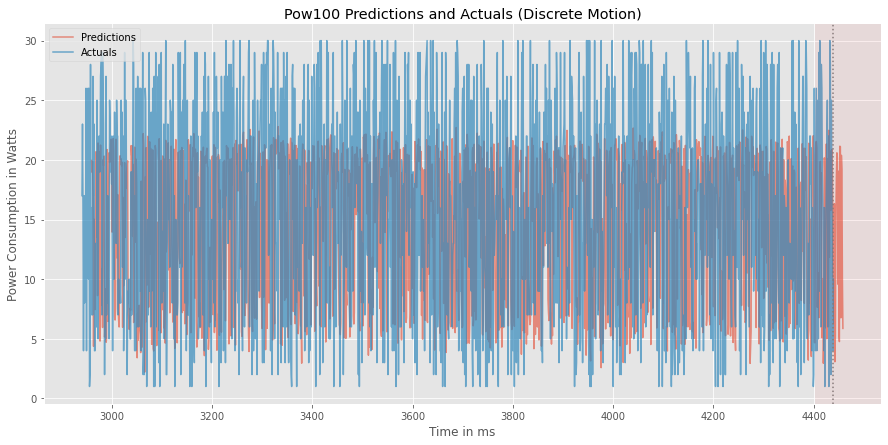

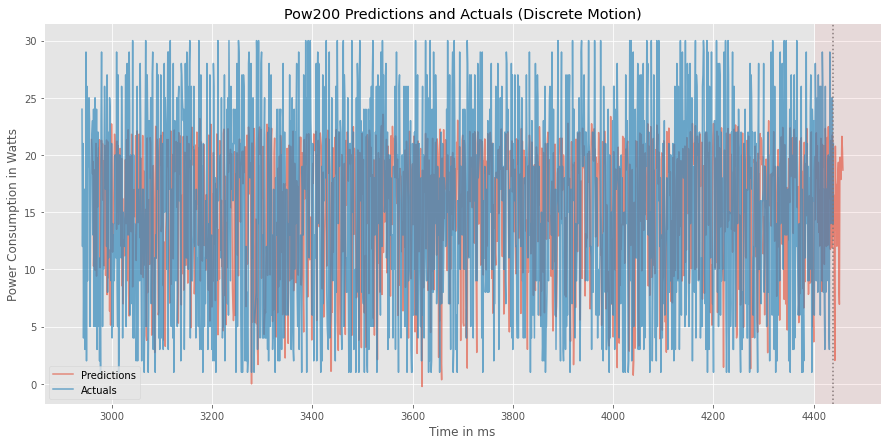

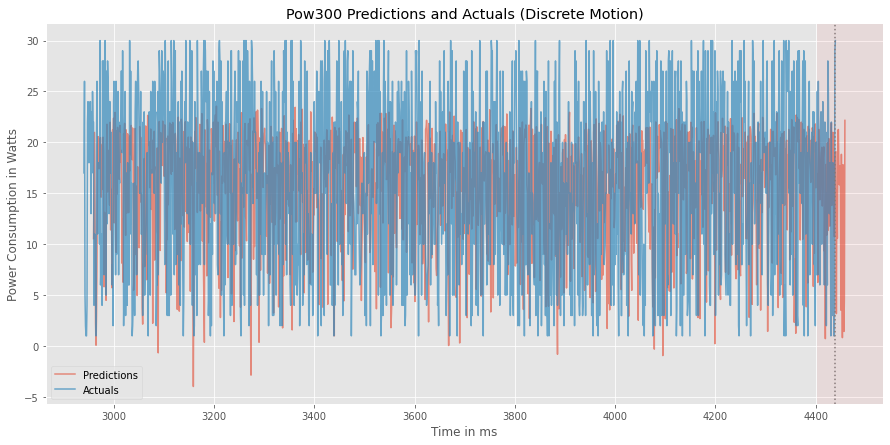

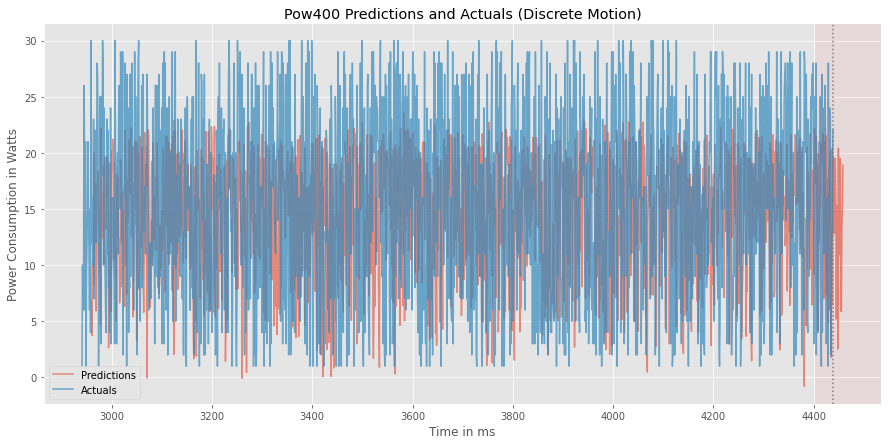

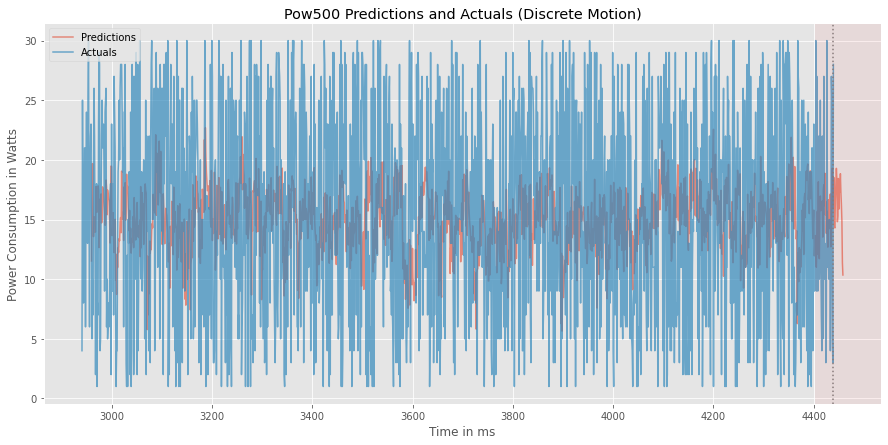

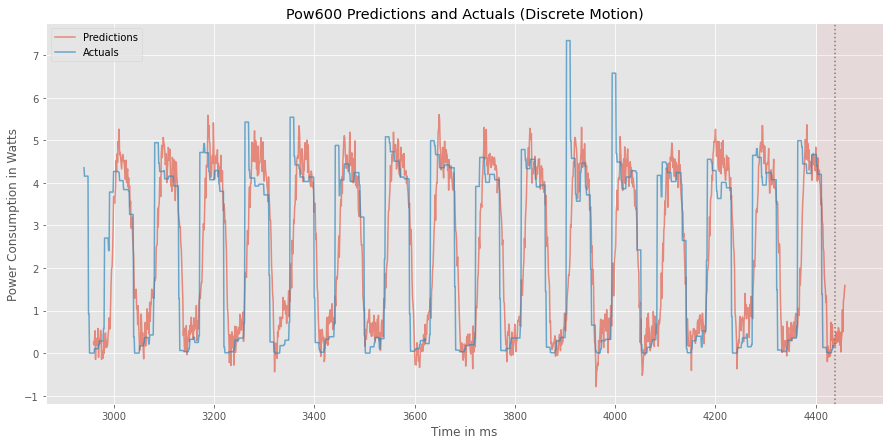

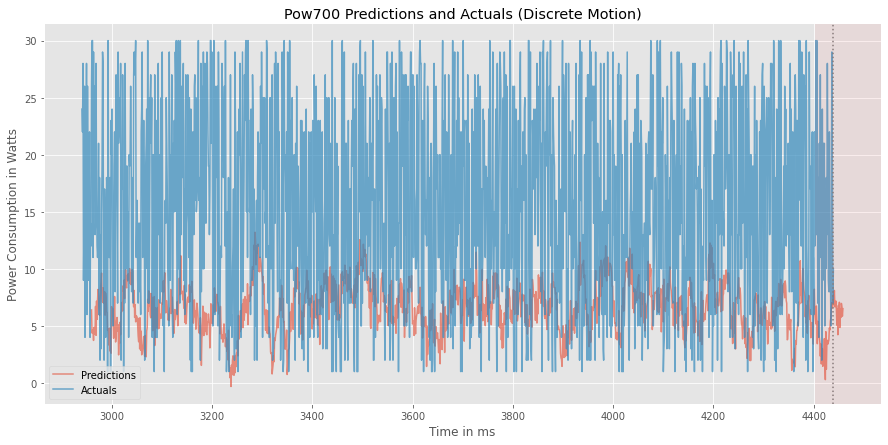

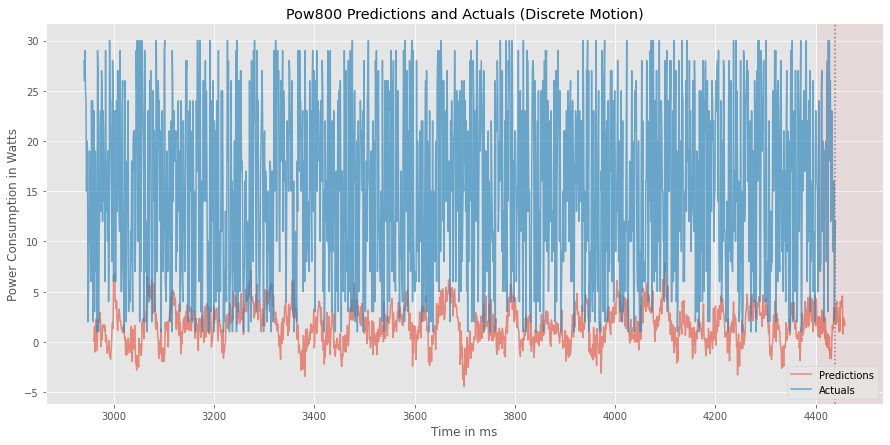

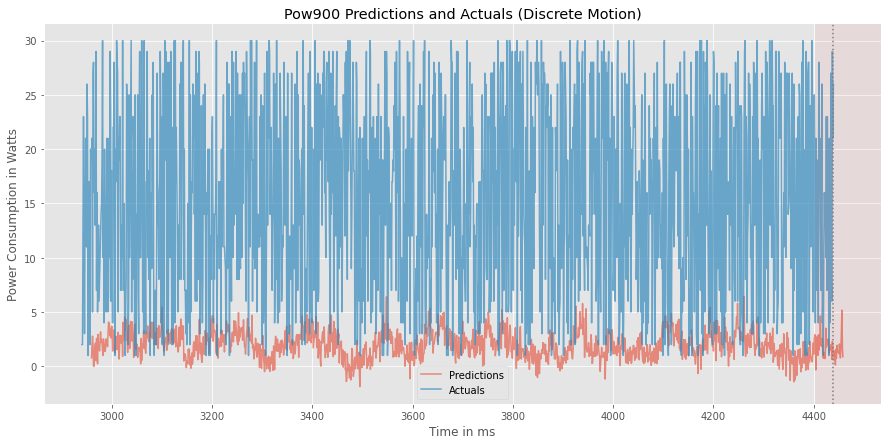

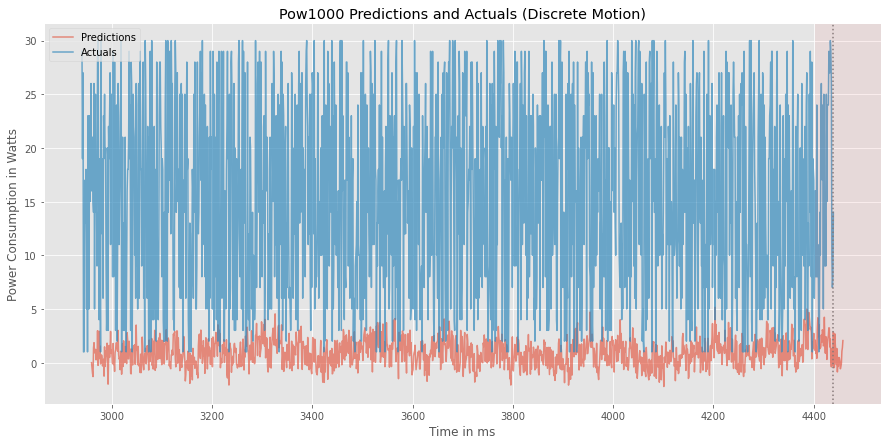

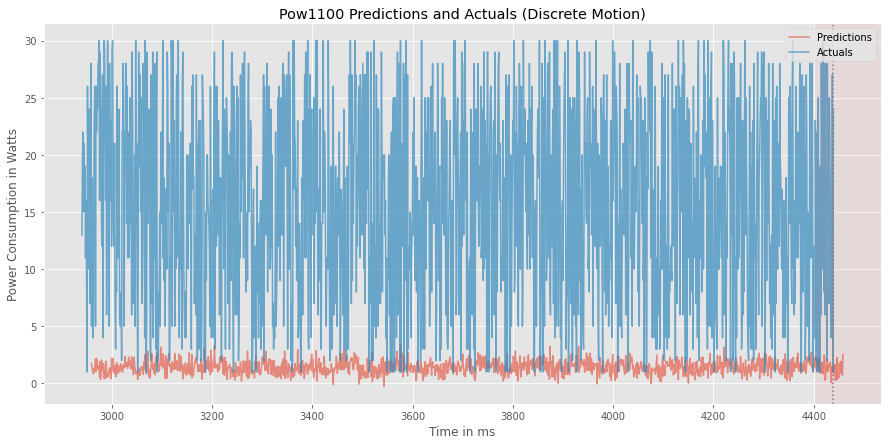

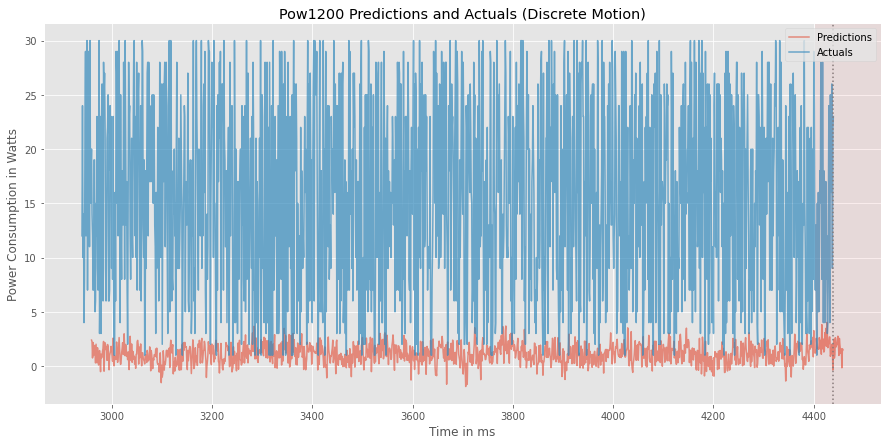

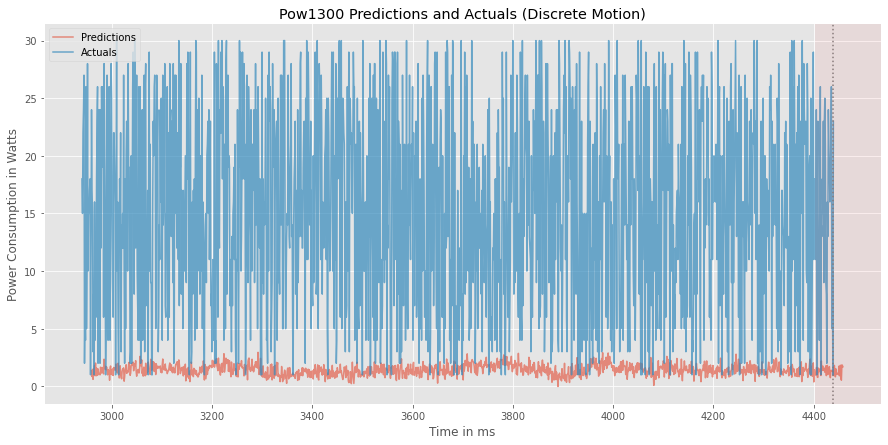

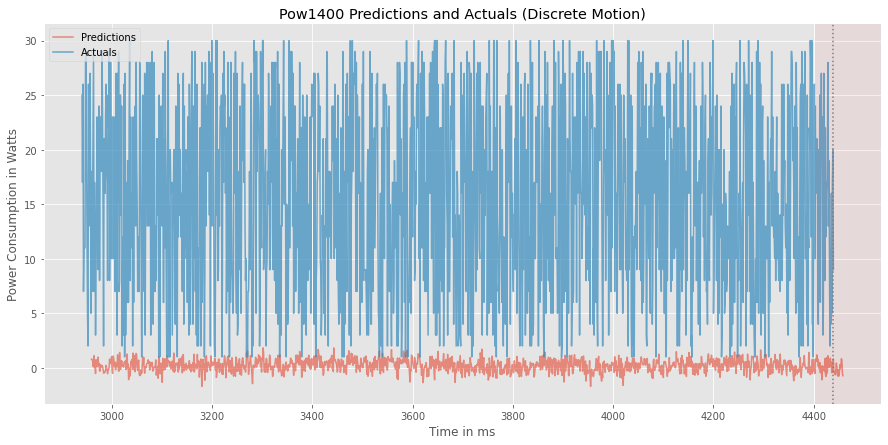

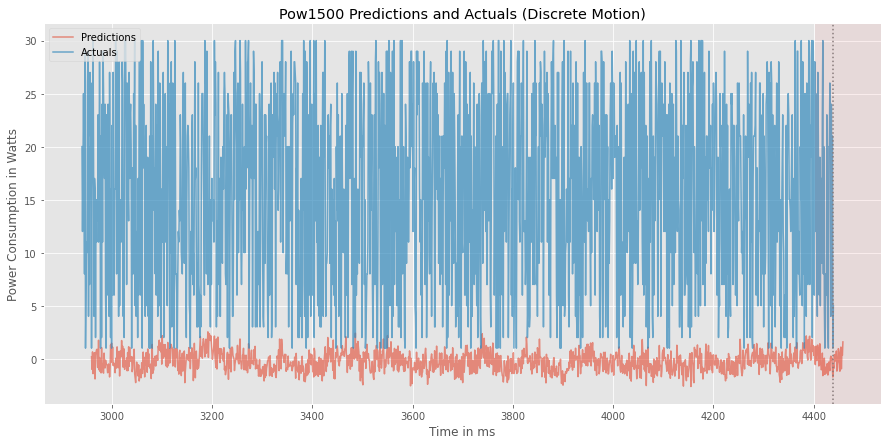

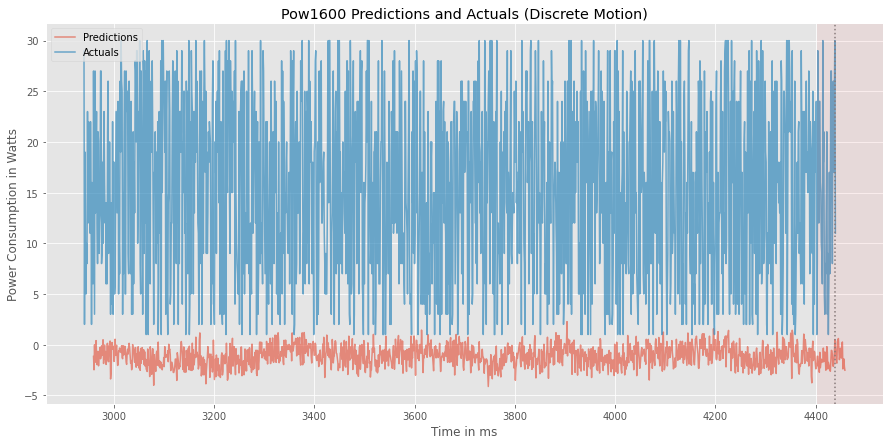

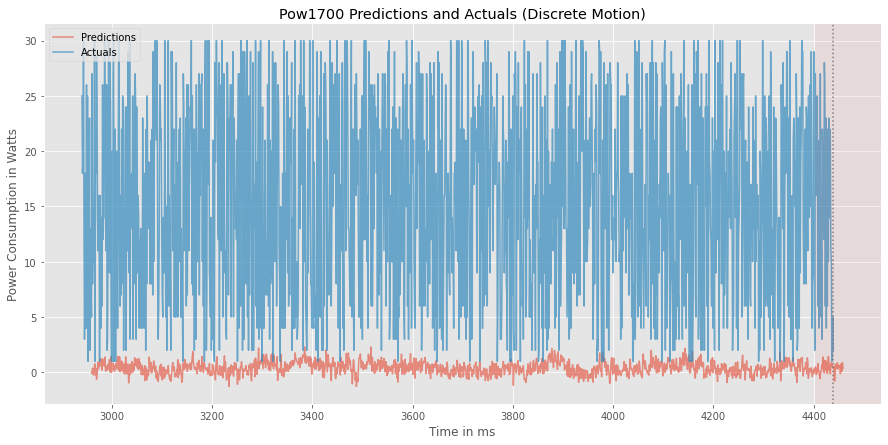

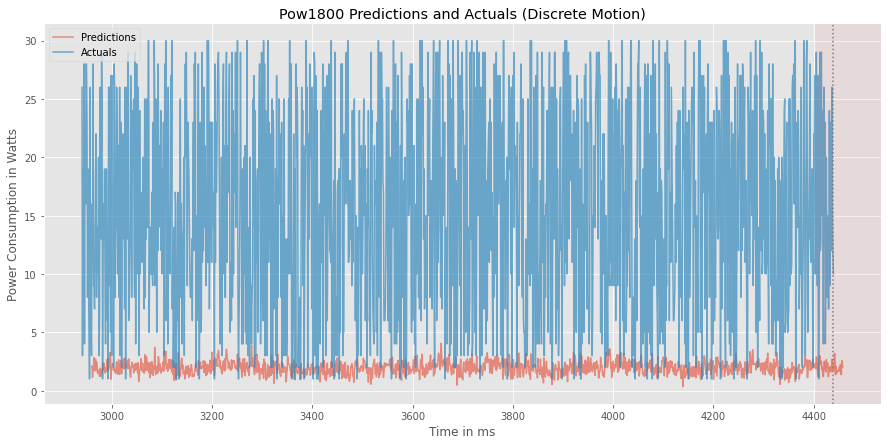

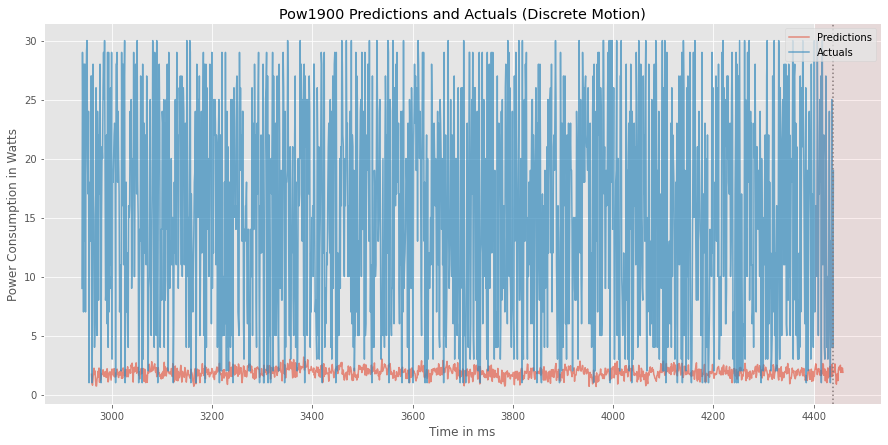

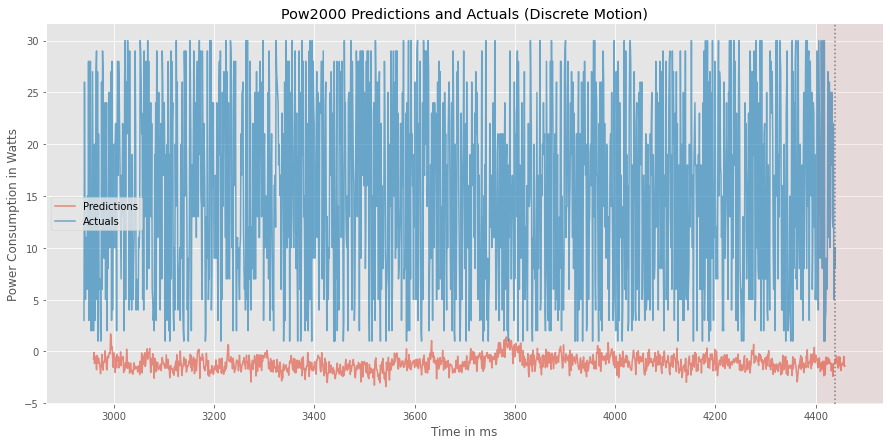

In [46]:
print_act_and_pred_tables(re_yhat2,re_y_test2,20, -1500,-1)

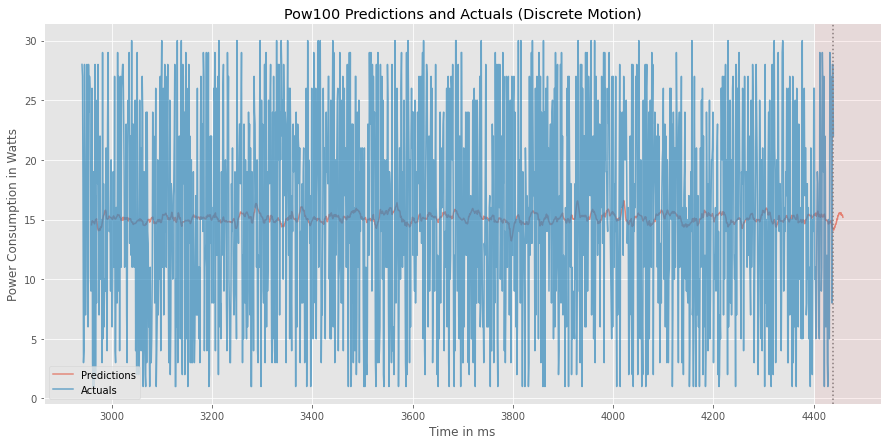

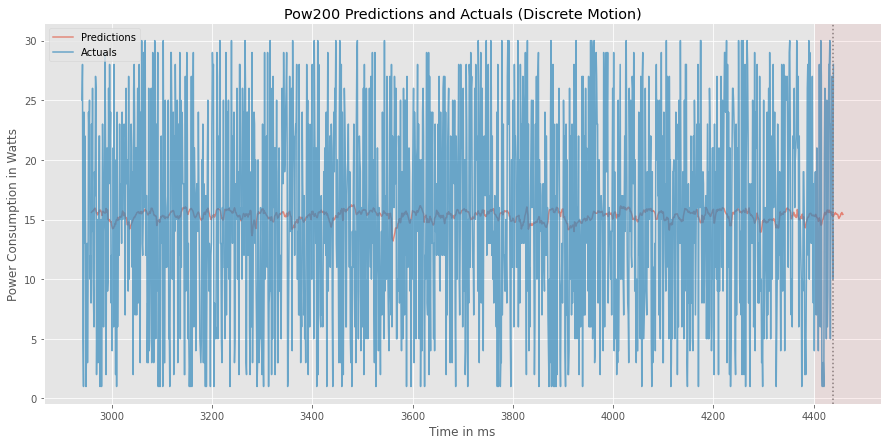

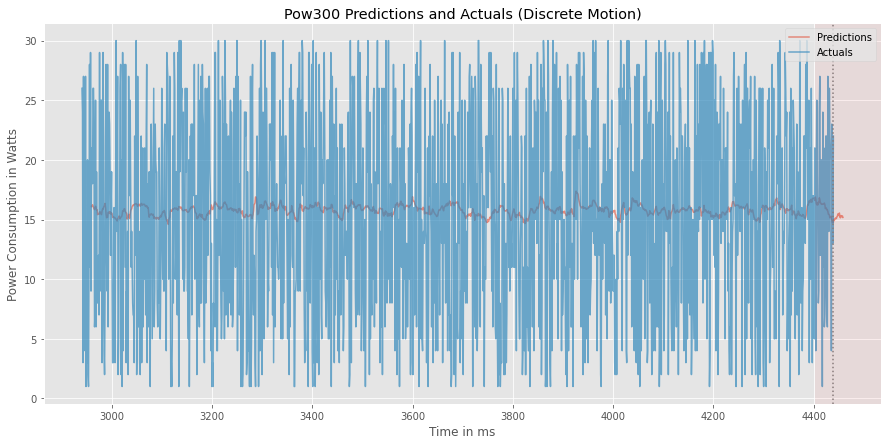

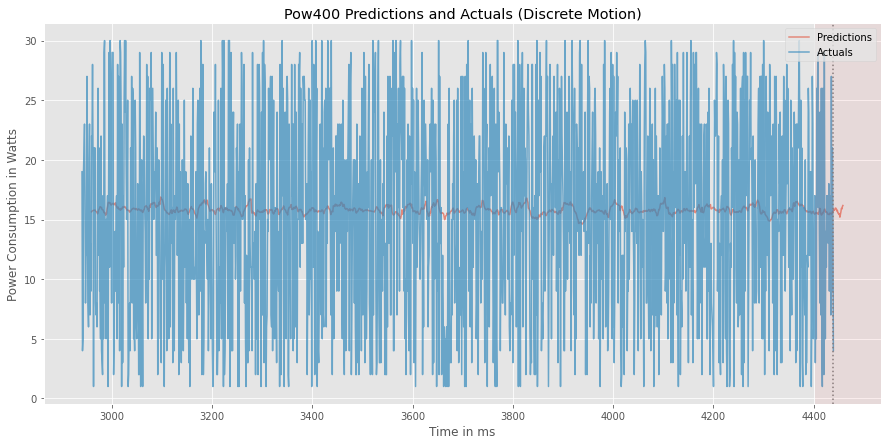

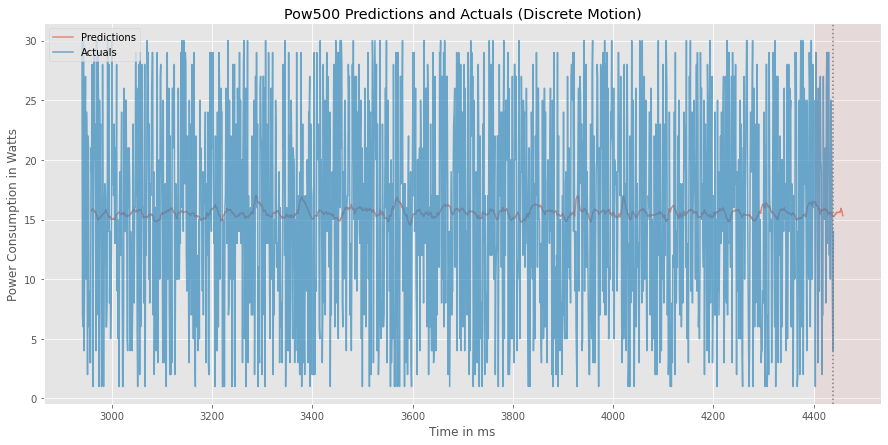

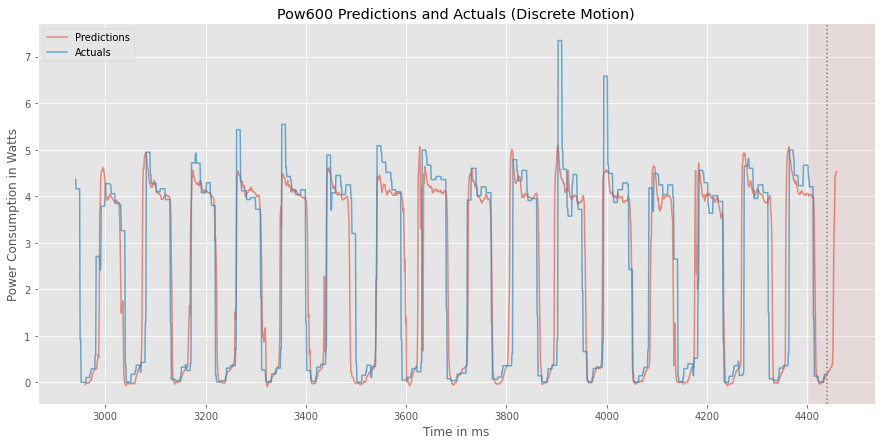

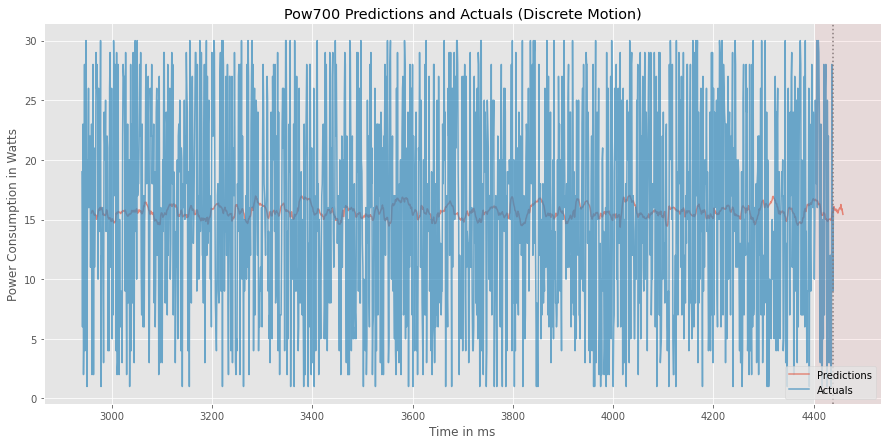

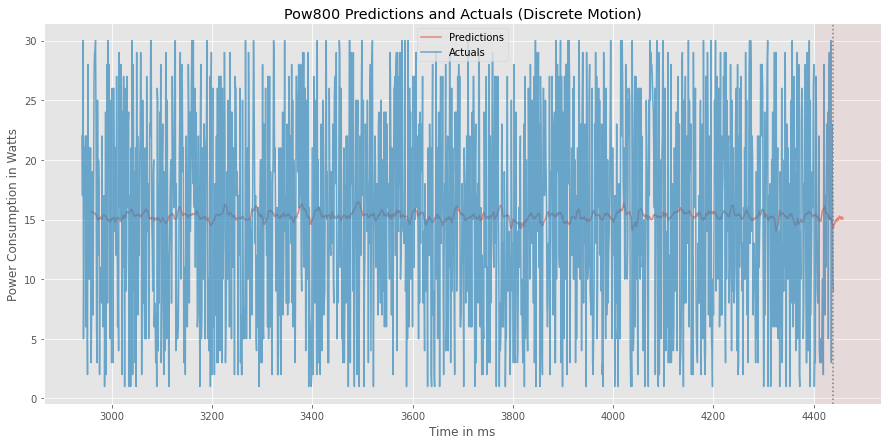

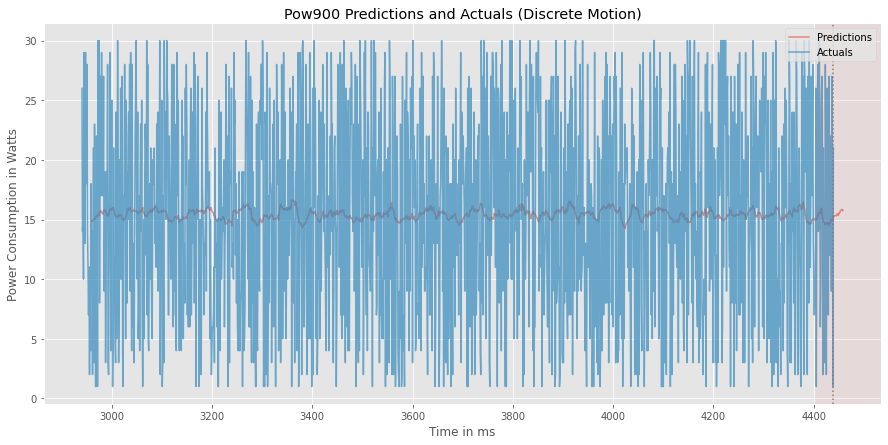

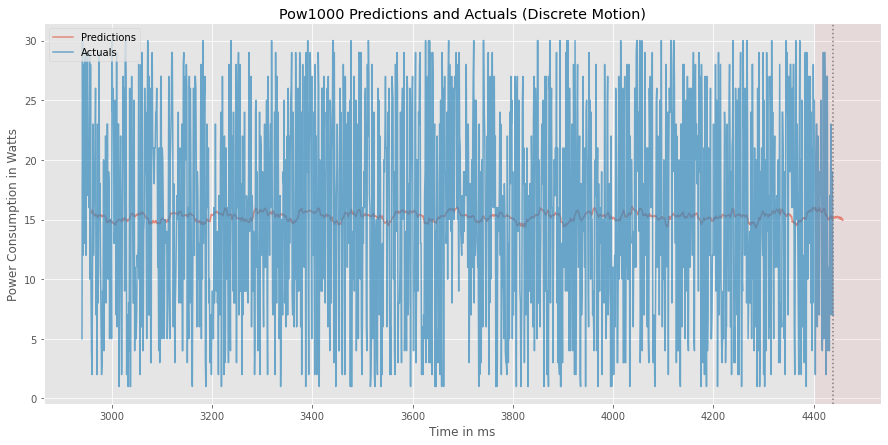

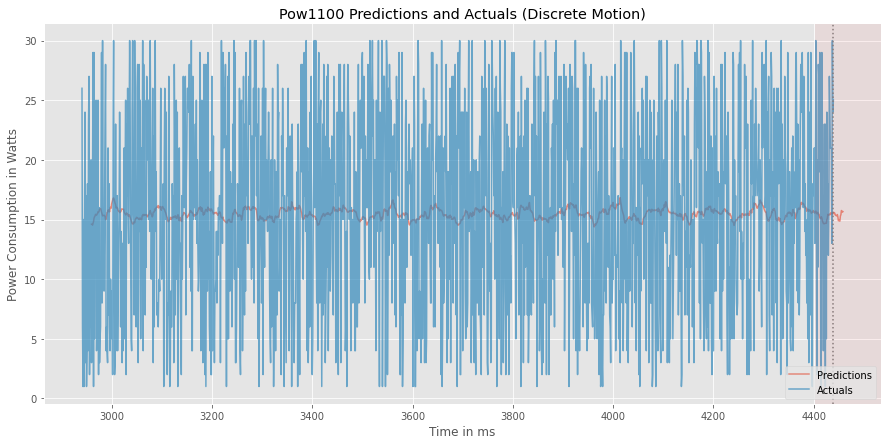

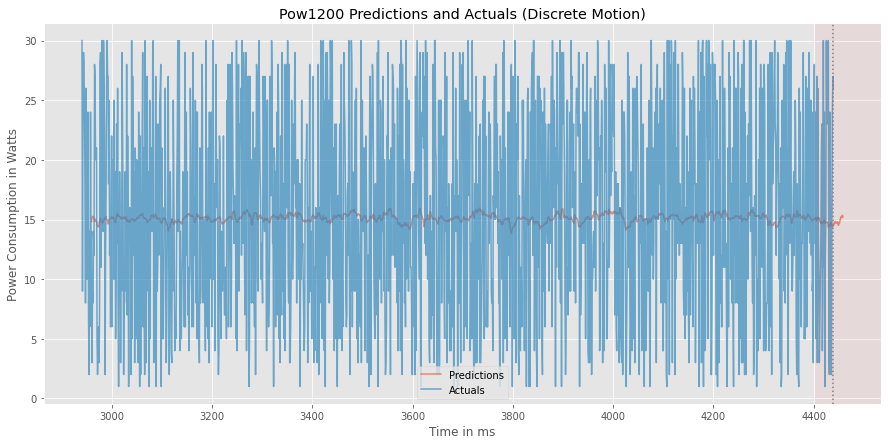

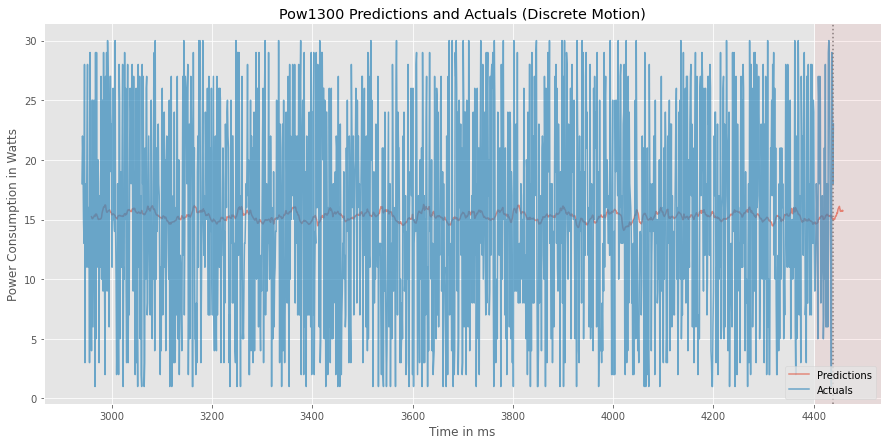

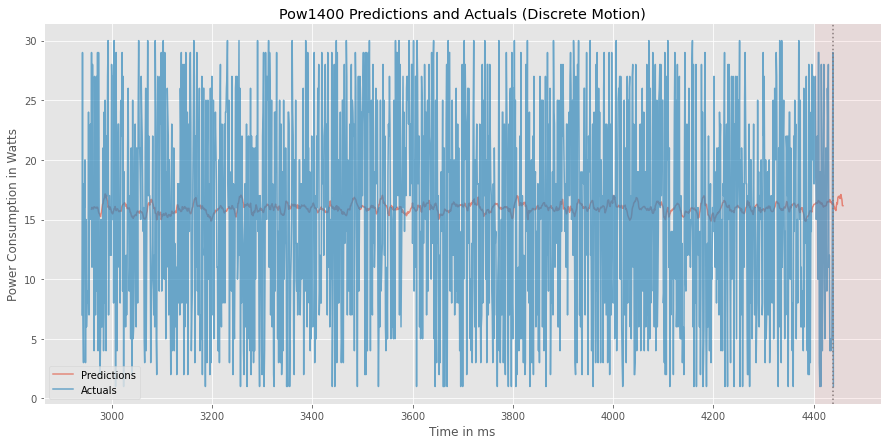

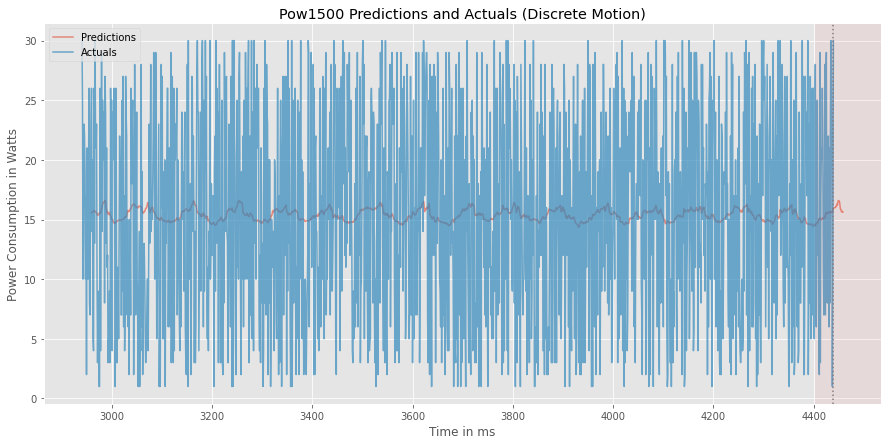

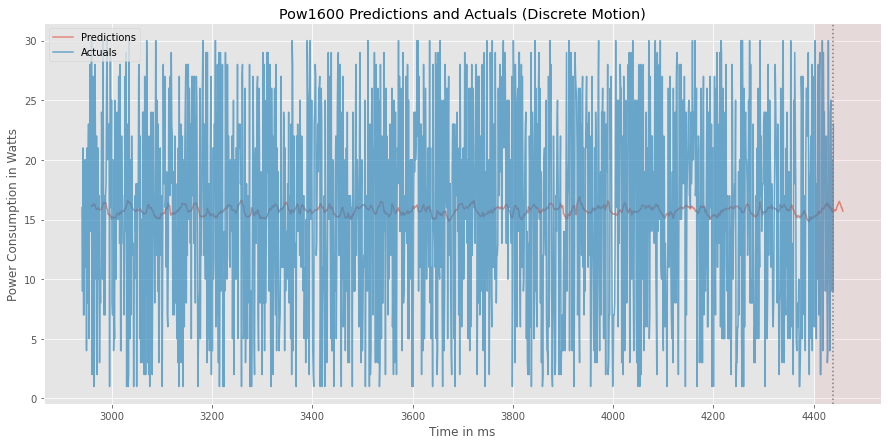

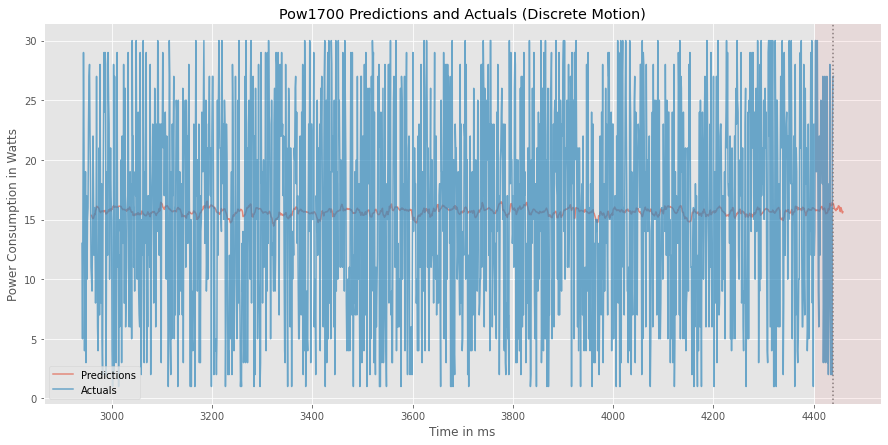

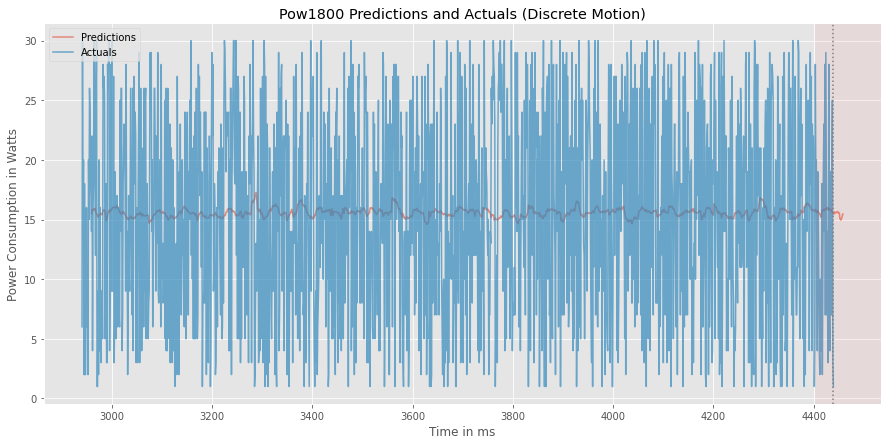

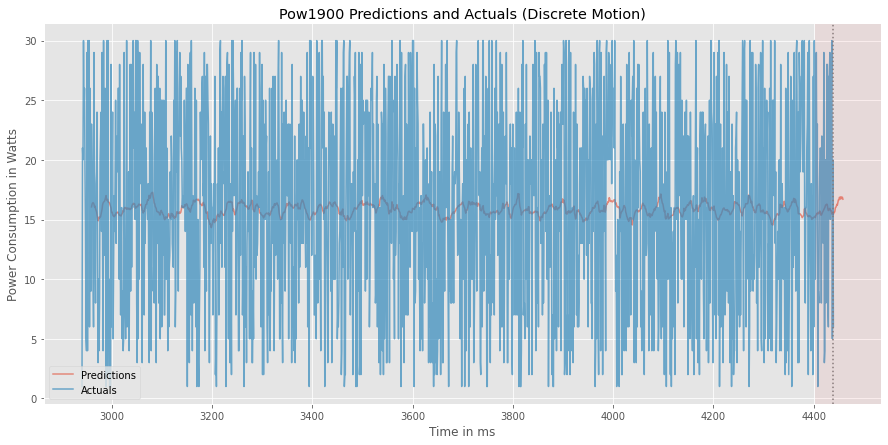

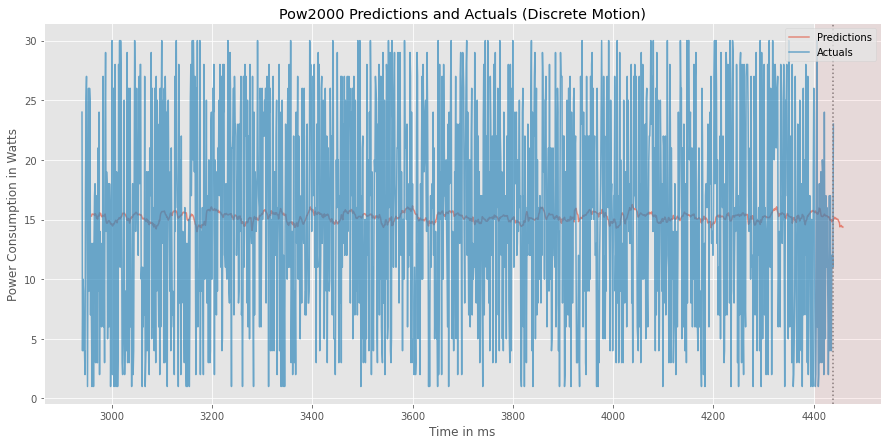

In [ ]:
print_act_and_pred_tables(re_yhat2,re_y_test2,20, -1500,-1)

In [ ]:
print_act_and_pred_tables(re_yhat2,re_y_test2,5, -1500,-1)